# PyCaret 2 Classification Example
This notebook is created using PyCaret 2.0. Last updated : 31-07-2020

In [1]:
# check version
from pycaret.utils import version
version()

'2.3.10'

# 1. Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/home/thu/INT3041E_AI_PM2.5-Concentration-Estimation/data/meteorological/meteorological.csv')
data

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
1,2020-01-01,79,105.103044,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,14.730005,0.0625,65.837502,102317.015625
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,15.249994,0.0000,63.812500,102335.617188
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,15.609980,0.0000,65.050003,102115.812500
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,14.982986,0.0000,70.632500,101743.898438


In [4]:
def calculate_aqi(pm25):
    ranges = [
        (0.0, 12.0, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 500.0, 301, 500),
    ]
    for c_low, c_high, aqi_low, aqi_high in ranges:
        if c_low <= pm25 <= c_high:
            return round((aqi_high - aqi_low) / (c_high - c_low) * (pm25 - c_low) + aqi_low)
    return 500  # default nếu vượt ngưỡng

In [5]:
def aqi_bucket(aqi):
    if aqi <= 50: return 'Good'
    elif aqi <= 100: return 'Moderate'
    elif aqi <= 150: return 'Unhealthy for Sensitive'
    elif aqi <= 200: return 'Unhealthy'
    elif aqi <= 300: return 'Very Unhealthy'
    else: return 'Hazardous'

In [6]:
data['AQI'] = data['pm25'].apply(calculate_aqi)
data

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M,AQI
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,183
1,2020-01-01,79,105.103044,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,177
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875,183
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,183
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,14.730005,0.0625,65.837502,102317.015625,60
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,15.249994,0.0000,63.812500,102335.617188,62
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,15.609980,0.0000,65.050003,102115.812500,50
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,14.982986,0.0000,70.632500,101743.898438,76


In [7]:
# Tính toán AQI và phân loại thành bucket
data['AQI_Bucket'] = data['AQI'].apply(aqi_bucket)
data

,time,ID,pm25,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M,AQI,AQI_Bucket
0,2020-01-01,19,116.949130,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,183,Unhealthy
1,2020-01-01,79,105.103044,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,177,Unhealthy
2,2020-01-01,163,118.285100,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875,183,Unhealthy
3,2020-01-01,300,116.739130,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,183,Unhealthy
4,2020-01-02,19,76.856667,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125,162,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11503,2021-12-31,163,16.154054,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,14.730005,0.0625,65.837502,102317.015625,60,Moderate
11504,2021-12-31,172,17.153631,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,15.249994,0.0000,63.812500,102335.617188,62,Moderate
11505,2021-12-31,173,11.901323,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,15.609980,0.0000,65.050003,102115.812500,50,Good
11506,2021-12-31,195,24.209832,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,14.982986,0.0000,70.632500,101743.898438,76,Moderate


In [8]:
data = data.drop(columns=['time', 'ID', 'pm25', 'AQI'])
data

,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M,AQI_Bucket
0,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,Unhealthy
1,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,Unhealthy
2,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875,Unhealthy
3,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,Unhealthy
4,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125,Unhealthy
...,...,...,...,...,...,...,...,...,...,...,...,...
11503,21.024347,106.017288,4.988467,1.669253,22.916901,16.846243,18.989985,14.730005,0.0625,65.837502,102317.015625,Moderate
11504,20.927000,106.314000,4.784339,1.322285,353.486359,17.187494,18.839991,15.249994,0.0000,63.812500,102335.617188,Moderate
11505,20.977400,106.430800,4.589203,0.235641,347.438232,17.732492,19.739985,15.609980,0.0000,65.050003,102115.812500,Good
11506,21.338470,105.367300,5.228505,1.295622,97.865257,16.122246,17.824003,14.982986,0.0000,70.632500,101743.898438,Moderate


# 2. Initialize Setup

In [9]:
from pycaret.classification import *
clf1 = setup(data, target = 'AQI_Bucket', silent=True, session_id=123, fold = 3)

,Description,Value
0,session_id,123
1,Target,AQI_Bucket
2,Target Type,Multiclass
3,Label Encoded,"Good: 0, Hazardous: 1, Moderate: 2, Unhealthy: 3, Unhealthy for Sensitive: 4, Very Unhealthy: 5"
4,Original Data,"(11508, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# 3. Compare Baseline

In [10]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6739,0.8542,0.4421,0.6622,0.6603,0.4925,0.4989,0.8100
lightgbm,Light Gradient Boosting Machine,0.6706,0.8511,0.4420,0.6594,0.6584,0.4900,0.4951,715.3467
et,Extra Trees Classifier,0.6695,0.8491,0.4477,0.6570,0.6554,0.4860,0.4924,0.6467
gbc,Gradient Boosting Classifier,0.6390,0.8238,0.4090,0.6274,0.6139,0.4249,0.4394,10.0667
dt,Decision Tree Classifier,0.5744,0.6849,0.4029,0.5771,0.5755,0.3717,0.3719,0.1000
lda,Linear Discriminant Analysis,0.5445,0.7228,0.2718,0.5019,0.4746,0.2316,0.2618,0.0400
knn,K Neighbors Classifier,0.5205,0.6945,0.2984,0.4895,0.4954,0.2427,0.2484,1.9700
ridge,Ridge Classifier,0.5151,0.0000,0.2232,0.4226,0.4080,0.1370,0.1791,0.0267
qda,Quadratic Discriminant Analysis,0.5073,0.7365,0.3818,0.5291,0.5027,0.2960,0.3037,0.0467
nb,Naive Bayes,0.4971,0.7013,0.3310,0.4902,0.4618,0.2567,0.2716,2.1600


# 4. Create Model

In [11]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6562,0.8444,0.4350,0.6439,0.6427,0.4639,0.4699
1,0.6734,0.8519,0.4440,0.6615,0.6602,0.4968,0.5017
2,0.6823,0.8570,0.4471,0.6729,0.6722,0.5093,0.5136
Mean,0.6706,0.8511,0.4420,0.6594,0.6584,0.4900,0.4951
Std,0.0108,0.0052,0.0052,0.0119,0.0121,0.0192,0.0184


In [12]:
rf = create_model('rf', fold = 3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6726,0.8501,0.4444,0.6610,0.6584,0.4880,0.4952
1,0.6734,0.8533,0.4373,0.6609,0.6574,0.4914,0.4989
2,0.6756,0.8593,0.4447,0.6646,0.6650,0.4982,0.5026
Mean,0.6739,0.8542,0.4421,0.6622,0.6603,0.4925,0.4989
Std,0.0013,0.0038,0.0034,0.0017,0.0034,0.0042,0.0030


In [13]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5795,0.6855,0.4007,0.5780,0.5785,0.3735,0.3736
1,0.5639,0.6800,0.3981,0.5693,0.5664,0.3604,0.3605
2,0.5799,0.6893,0.4099,0.5841,0.5815,0.3813,0.3816
Mean,0.5744,0.6849,0.4029,0.5771,0.5755,0.3717,0.3719
Std,0.0075,0.0038,0.0051,0.0061,0.0066,0.0086,0.0087


In [14]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6384,0.8165,0.4068,0.6289,0.6118,0.4200,0.4363
1,0.6417,0.8261,0.4164,0.6334,0.6175,0.4316,0.4456
2,0.6369,0.8288,0.4040,0.6200,0.6123,0.4232,0.4362
Mean,0.6390,0.8238,0.4090,0.6274,0.6139,0.4249,0.4394
Std,0.0020,0.0053,0.0053,0.0056,0.0025,0.0049,0.0044


In [15]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4834,0.6518,0.1946,0.4857,0.3765,0.0757,0.0993
1,0.4931,0.6810,0.1976,0.3679,0.3758,0.0786,0.1122
2,0.4909,0.6651,0.2028,0.4333,0.3823,0.0807,0.1117
Mean,0.4891,0.6660,0.1983,0.4290,0.3782,0.0783,0.1077
Std,0.0041,0.0119,0.0034,0.0482,0.0029,0.0020,0.0060


In [16]:
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6655,0.8463,0.4409,0.6526,0.6506,0.4778,0.4849
1,0.6737,0.8493,0.4568,0.6609,0.6583,0.4932,0.5002
2,0.6693,0.8517,0.4455,0.6577,0.6574,0.4871,0.4922
Mean,0.6695,0.8491,0.4477,0.6570,0.6554,0.4860,0.4924
Std,0.0033,0.0022,0.0067,0.0034,0.0034,0.0063,0.0062


In [17]:
qda = create_model('qda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4931,0.7295,0.3833,0.5204,0.4955,0.2809,0.2861
1,0.5009,0.7414,0.3695,0.5251,0.4936,0.2883,0.2984
2,0.5277,0.7387,0.3925,0.5417,0.5190,0.3190,0.3265
Mean,0.5073,0.7365,0.3818,0.5291,0.5027,0.2960,0.3037
Std,0.0148,0.0051,0.0095,0.0092,0.0116,0.0165,0.0169


In [18]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5050,0.5767,0.2852,0.4652,0.4598,0.2250,0.2352
1,0.3691,0.5733,0.2538,0.3334,0.3495,0.1076,0.1168
2,0.5214,0.5795,0.2729,0.4763,0.4660,0.2254,0.2404
Mean,0.4652,0.5765,0.2706,0.4250,0.4251,0.1860,0.1974
Std,0.0683,0.0025,0.0129,0.0649,0.0535,0.0555,0.0571


In [19]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4864,0.6908,0.3189,0.4837,0.4567,0.2405,0.2531
1,0.4994,0.7041,0.3348,0.4958,0.4625,0.2630,0.2797
2,0.5054,0.7091,0.3393,0.4910,0.4660,0.2666,0.2819
Mean,0.4971,0.7013,0.3310,0.4902,0.4618,0.2567,0.2716
Std,0.0079,0.0077,0.0088,0.0050,0.0038,0.0116,0.0131


In [20]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5229,0.6940,0.3024,0.4903,0.4959,0.2409,0.2478
1,0.5169,0.6923,0.2882,0.4855,0.4919,0.2384,0.2437
2,0.5218,0.6972,0.3046,0.4928,0.4985,0.2488,0.2538
Mean,0.5205,0.6945,0.2984,0.4895,0.4954,0.2427,0.2484
Std,0.0026,0.0020,0.0073,0.0030,0.0027,0.0044,0.0041


In [21]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [22]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'lightgbm']

In [23]:
try:
    ensembled_models = compare_models(include=models(type='ensemble').index.tolist(), fold=3)
except Exception as e:
    with open("error_log.txt", "w") as f:
        f.write(str(e))
    print("An error occurred. Details have been saved to error_log.txt.")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6739,0.8542,0.4421,0.6622,0.6603,0.4925,0.4989,0.9067
lightgbm,Light Gradient Boosting Machine,0.6706,0.8511,0.4420,0.6594,0.6584,0.4900,0.4951,548.1833
et,Extra Trees Classifier,0.6695,0.8491,0.4477,0.6570,0.6554,0.4860,0.4924,0.7667
gbc,Gradient Boosting Classifier,0.6390,0.8238,0.4090,0.6274,0.6139,0.4249,0.4394,14.0967
ada,Ada Boost Classifier,0.4652,0.5765,0.2706,0.4250,0.4251,0.1860,0.1974,0.6733


# 5. Tune Hyperparameters

In [24]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4860,0.6513,0.1977,0.4937,0.3807,0.0822,0.1070
1,0.4983,0.6764,0.2019,0.4999,0.3821,0.0930,0.1292
2,0.4920,0.6666,0.2050,0.3747,0.3831,0.0868,0.1182
Mean,0.4921,0.6647,0.2016,0.4561,0.3819,0.0874,0.1182
Std,0.0050,0.0103,0.0030,0.0576,0.0010,0.0044,0.0090


In [25]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5814,0.7373,0.3088,0.5660,0.5390,0.3083,0.3309
1,0.5963,0.7572,0.3130,0.5804,0.5402,0.3285,0.3595
2,0.6048,0.7534,0.3190,0.5890,0.5523,0.3374,0.3719
Mean,0.5942,0.7493,0.3136,0.5785,0.5438,0.3247,0.3541
Std,0.0097,0.0086,0.0042,0.0095,0.0060,0.0122,0.0172


In [26]:
tuned_gbc = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6514,0.8380,0.4261,0.6418,0.6417,0.4614,0.4655
1,0.6674,0.8390,0.4392,0.6574,0.6567,0.4892,0.4933
2,0.6615,0.8438,0.4665,0.6533,0.6535,0.4798,0.4831
Mean,0.6601,0.8402,0.4439,0.6508,0.6507,0.4768,0.4806
Std,0.0066,0.0025,0.0168,0.0066,0.0064,0.0115,0.0115


In [27]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6655,0.8413,0.4509,0.6557,0.6535,0.4781,0.4843
1,0.6801,0.8497,0.4458,0.6670,0.6649,0.5036,0.5101
2,0.6734,0.8523,0.4355,0.6615,0.6596,0.4907,0.4973
Mean,0.6730,0.8478,0.4441,0.6614,0.6593,0.4908,0.4972
Std,0.0059,0.0047,0.0064,0.0046,0.0047,0.0104,0.0105


In [28]:
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5844,0.7648,0.2968,0.4809,0.4979,0.2891,0.3388
1,0.5981,0.7893,0.3084,0.4917,0.5141,0.3140,0.3657
2,0.6004,0.7859,0.3110,0.4973,0.5171,0.3183,0.3707
Mean,0.5943,0.7800,0.3054,0.4900,0.5097,0.3071,0.3584
Std,0.0071,0.0108,0.0062,0.0068,0.0084,0.0129,0.0140


# 6. Ensemble Model

In [29]:
bagged_rf = ensemble_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6659,0.8489,0.4165,0.6565,0.6446,0.4675,0.4811
1,0.6663,0.8550,0.4032,0.6542,0.6442,0.4709,0.4837
2,0.6790,0.8580,0.4210,0.6695,0.6627,0.4952,0.5043
Mean,0.6704,0.8540,0.4136,0.6601,0.6505,0.4779,0.4897
Std,0.0061,0.0038,0.0076,0.0067,0.0086,0.0123,0.0104


In [30]:
boosted_rf = ensemble_model(rf, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6737,0.8483,0.4508,0.6626,0.6595,0.4894,0.4969
1,0.6734,0.8536,0.4368,0.6612,0.6571,0.4903,0.4983
2,0.6786,0.8568,0.4479,0.6664,0.6668,0.5027,0.5075
Mean,0.6752,0.8529,0.4452,0.6634,0.6611,0.4942,0.5009
Std,0.0024,0.0035,0.0061,0.0022,0.0041,0.0061,0.0047


In [31]:
bagged_lightgbm = ensemble_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6682,0.8519,0.4292,0.6581,0.6506,0.4755,0.4859
1,0.6756,0.8588,0.4236,0.6649,0.6593,0.4929,0.5014
2,0.6827,0.8589,0.4310,0.6710,0.6694,0.5067,0.5128
Mean,0.6755,0.8565,0.4279,0.6647,0.6598,0.4917,0.5000
Std,0.0059,0.0033,0.0032,0.0053,0.0077,0.0128,0.0110


In [32]:
boosted_lightgbm = ensemble_model(lightgbm, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6611,0.8431,0.4308,0.6597,0.6493,0.4677,0.4752
1,0.6790,0.8501,0.4472,0.6731,0.6670,0.5002,0.5063
2,0.6663,0.8468,0.4351,0.6657,0.6582,0.4838,0.4881
Mean,0.6688,0.8467,0.4377,0.6662,0.6582,0.4839,0.4899
Std,0.0075,0.0029,0.0069,0.0055,0.0072,0.0133,0.0128


In [33]:
bagged_et = ensemble_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6670,0.8497,0.4197,0.6546,0.6468,0.4722,0.4841
1,0.6730,0.8533,0.4237,0.6600,0.6522,0.4847,0.4959
2,0.6655,0.8535,0.4230,0.6553,0.6496,0.4749,0.4831
Mean,0.6685,0.8521,0.4221,0.6566,0.6495,0.4773,0.4877
Std,0.0032,0.0017,0.0017,0.0024,0.0022,0.0054,0.0058


In [34]:
boosted_et = ensemble_model(et, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6622,0.8449,0.4309,0.6478,0.6475,0.4734,0.4797
1,0.6648,0.8474,0.4306,0.6492,0.6485,0.4793,0.4860
2,0.6734,0.8521,0.4622,0.6624,0.6619,0.4932,0.4985
Mean,0.6668,0.8481,0.4412,0.6531,0.6526,0.4820,0.4881
Std,0.0048,0.0030,0.0149,0.0065,0.0066,0.0083,0.0078


In [35]:
bagged_gbc = ensemble_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6302,0.8193,0.3943,0.6201,0.5954,0.3983,0.4206
1,0.6413,0.8307,0.4038,0.6376,0.6124,0.4249,0.4435
2,0.6406,0.8326,0.4033,0.6265,0.6136,0.4241,0.4401
Mean,0.6374,0.8275,0.4005,0.6281,0.6071,0.4158,0.4347
Std,0.0051,0.0059,0.0044,0.0072,0.0083,0.0124,0.0101


In [36]:
boosted_gbc = ensemble_model(gbc, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5862,0.7523,0.3634,0.5653,0.5609,0.3374,0.3485
1,0.6432,0.8125,0.4088,0.6287,0.6310,0.4510,0.4549
2,0.3318,0.5428,0.2323,0.3811,0.3412,0.0739,0.0777
Mean,0.5204,0.7025,0.3348,0.5250,0.5111,0.2874,0.2937
Std,0.1354,0.1156,0.0748,0.1050,0.1235,0.1579,0.1588


# 7. Blend Models

In [37]:
blender = blend_models(estimator_list = [rf, lightgbm, boosted_rf, boosted_lightgbm, bagged_lightgbm, tuned_lightgbm], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6730,0.8569,0.4434,0.6626,0.6584,0.4867,0.4948
1,0.6857,0.8630,0.4447,0.6750,0.6691,0.5088,0.5174
2,0.6886,0.8656,0.4554,0.6802,0.6780,0.5173,0.5225
Mean,0.6824,0.8618,0.4478,0.6726,0.6685,0.5042,0.5116
Std,0.0068,0.0037,0.0054,0.0074,0.0080,0.0129,0.0120


# 8. Stack Models

In [38]:
stacker = stack_models(estimator_list = [boosted_lightgbm,bagged_lightgbm,tuned_lightgbm, boosted_rf, rf], meta_model=lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6752,0.8546,0.4452,0.6663,0.6640,0.4958,0.5010
1,0.6704,0.8589,0.4382,0.6579,0.6587,0.4950,0.4985
2,0.6711,0.8602,0.4391,0.6602,0.6620,0.4964,0.4989
Mean,0.6723,0.8579,0.4409,0.6615,0.6616,0.4957,0.4995
Std,0.0021,0.0024,0.0031,0.0035,0.0022,0.0005,0.0011


# 9. Analyze Model

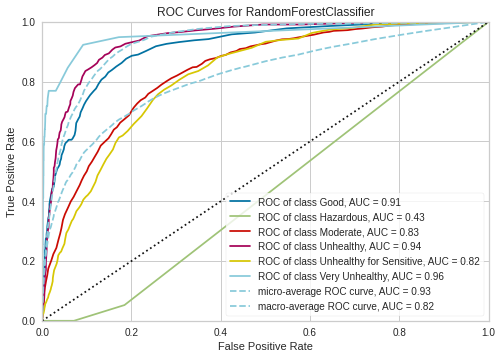

In [39]:
plot_model(rf)

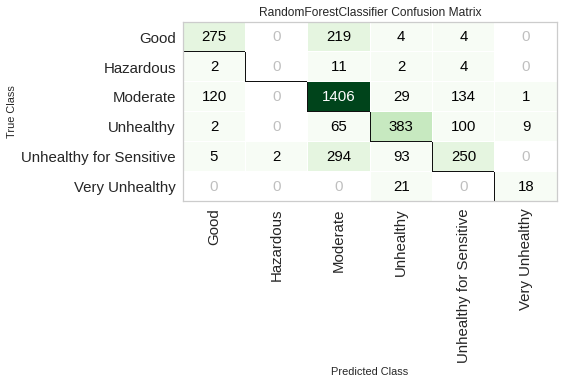

In [40]:
plot_model(rf, plot = 'confusion_matrix')

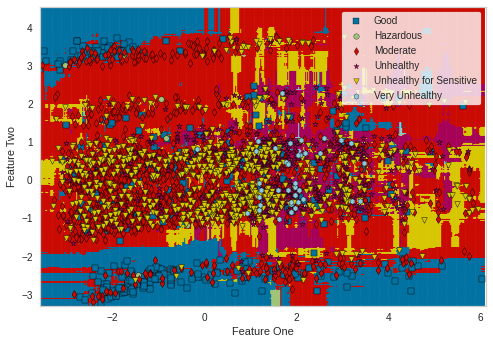

In [41]:
plot_model(rf, plot = 'boundary')

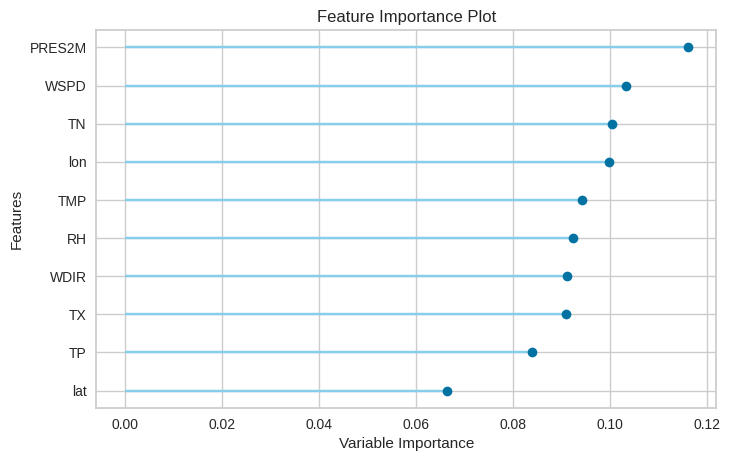

In [42]:
plot_model(rf, plot = 'feature')

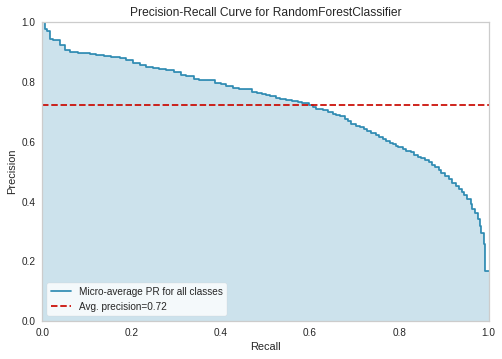

In [43]:
plot_model(rf, plot = 'pr')

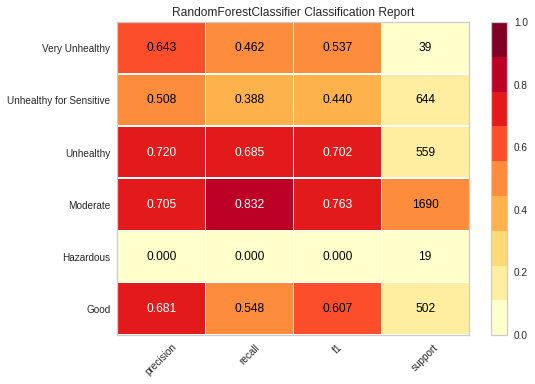

In [44]:
plot_model(rf, plot = 'class_report')

In [45]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

# 11. AutoML()

In [46]:
best = automl(optimize = 'Recall')
best

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

# 12. Predict Model

In [47]:
pred_holdouts = predict_model(rf)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.6754,0.8589,0.4858,0.6625,0.6636,0.4995,0.5043


,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M,AQI_Bucket,Label,Score
0,21.163853,105.923561,6.000813,4.620680,30.317810,15.333742,17.709986,13.489985,0.000000,49.099998,102498.429688,Moderate,Unhealthy for Sensitive,0.49
1,21.187340,106.074295,5.014936,4.157365,150.475220,21.374998,27.179987,16.540003,0.000000,66.800003,101153.812500,Unhealthy,Unhealthy,0.56
2,21.187340,106.074295,5.014936,2.569136,137.445023,28.562510,33.450005,24.950006,0.000000,72.162498,100712.351562,Moderate,Moderate,0.49
3,21.127739,105.889542,5.476497,4.775660,356.188110,22.019312,22.851994,21.311989,43.293751,91.831253,100949.601562,Good,Good,0.94
4,21.037727,106.146805,5.693217,1.361999,66.469971,22.162504,24.350000,20.040003,0.625000,83.350006,101447.992188,Moderate,Good,0.37


In [48]:
new_data = data.copy()
new_data.drop(['AQI_Bucket'], axis=1, inplace=True)
predict_new = predict_model(best, data=new_data)
predict_new.head()

[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7


,lat,lon,SQRT_SEA_DEM_LAT,WSPD,WDIR,TMP,TX,TN,TP,RH,PRES2M,Label,Score
0,21.049750,105.741870,5.922647,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,Unhealthy,0.8731
1,21.015250,105.800130,4.307231,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,Unhealthy,0.8671
2,21.024347,106.017288,4.988467,0.651509,145.395233,20.677492,23.029993,18.879999,0.1250,73.687500,102228.796875,Unhealthy,0.7281
3,21.023532,105.853941,4.865087,1.136119,145.942749,20.811243,23.219995,18.939997,0.3750,74.750000,102197.203125,Unhealthy,0.8725
4,21.049750,105.741870,5.922647,2.744283,147.084442,22.176249,25.119989,20.299982,0.1875,78.012497,102025.328125,Unhealthy,0.9220


# 13. Save / Load Model

In [49]:
save_model(best, model_name='best-model-rf')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='AQI_Bucket', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                                                               importance_type='split',
                                                               learning_rate=0.1,
                                                               max_depth=-1,
                           

In [50]:
loaded_bestmodel = load_model('best-model-rf')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='AQI_Bucket', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                                                              importance_type='split',
                                                              learning_rate=0.1,
                                                              max

In [51]:
from sklearn import set_config
set_config(display='diagram')
loaded_bestmodel[0]

DataTypes_Auto_infer(categorical_features=[], display_types=False,
                     features_todrop=[], id_columns=[],
                     ml_usecase='classification', numerical_features=[],
                     target='AQI_Bucket', time_features=[])

In [52]:
from sklearn import set_config
set_config(display='text')

# 14. Deploy Model

In [53]:
# deploy_model(best, model_name = 'best-aqi', authentication = {'bucket' : 'pycaret-test'})

# 15. Get Config / Set Config

In [54]:
# X_train = get_config('X_train')
# X_train.head()

In [55]:
# get_config('seed')

# 16. MLFlow UI

In [56]:
# import os
# os.system("lsof -i :5000")

In [57]:
# !mlflow ui --port 5001
# !nohup mlflow ui --port 5001 &

# End
Thank you. For more information / tutorials on PyCaret, please visit https://www.pycaret.org